# Perceptron Learning Algorithm in Python

In this project, what I did was read in the Iris data set and then put it into a usable form. I chose to use a Pandas DataFrame because I can easily take out individual rows and pass them to `np.array(ROW)` in order to create the needed arrays. This is why I chose Numpy. the package 'time' is used to check how fast the perceptron runs, depending on how many iterations the user decides to test with. Matplotlib.pyplot was used to visualize the data.

The later code blocks are used to actually create the necessary functions, then to use them and test how well the perceptron algorithm works with the Iris data set. 

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
# Reading in the iris data into a dataframe
iris = pd.read_csv('iris_data.csv')
# Putting the data we want into a dataframe called 'data'
data = iris[['SepalLength', 'SepalWidth', 'Species']].loc[range(100)]

# Adds a column to data that gives us our expected output where for each row,
# if Species == 'setosa', expected output = 1 
# if Species == 'versicolor', expected output = -1
output = []
for i in data['Species']:
    if i == 'setosa':
        output.append(1)
    else:
        output.append(-1)
data['Expected Output'] = output

# Adding a column of biases (1) to each row, so I can quickly grab vectors from the dataframe
bias = []
for i in range(100):
    bias.append(1)
data['Bias'] = bias

# Reorganizing the column order for readability
data = data[['Species', 'SepalLength', 'SepalWidth', 'Bias', 'Expected Output']]
data.head(3)

,Species,SepalLength,SepalWidth,Bias,Expected Output
0,setosa,5.1,3.5,1,1
1,setosa,4.9,3.0,1,1
2,setosa,4.7,3.2,1,1


In [3]:
def h_sum(weight_vec, input_vec):
    """
    Function to add up the sum(weights_i x input_i), 
    essentially finding the dot product
    INPUTS:
        - weights_vec, weights vector passed as an array
        - input_vec, input vector also passed as an array. Should be
                    the same length as weights_vec
    OUTPUTS:
        - the dot product of weights_vec and input vec, a scalar float value
    """
    return np.dot(weight_vec, input_vec)

def sign(h, threshold = 0):
    """
    Takes the sum(weights x input) and decides whether the perceptron
    fires (returns 1) or doesn't fire (returns -1)
    INPUTS:
        - h, a scalar float value
        - threshold, the threshold that h should be greater than
                for the perceptron to fire. Default is zero.
    OUTPUTS:
        - Either 1 or -1, depending on whether the perceptron
            fires or doesn't fire.
    """
    if h > threshold:
        return 1
    if h < threshold:
        return -1
    
def perceptron(input_df, input_labels, weight_vec, num_iterations = 100):
    """
    Perceptron Algorithm that trains itself to recognize the difference 
    between linearly seperable data
    INPUTS:
        - input_df, an m x n Pandas DataFrame where each row is an input vector
        - input_labels, a List where each input_labels[i] is the correct
                    label for input_df[i]
        - weight_vec, a numpy array containing an array of weights to start with.
                    Should have length = n
        - num_iterations, an integer. This should be the number of times the algorithm
                    goes through the entire data set and updates the weights.
    OUTPUTS:
        - weights, a numpy array with the updated weights. Should be length = n.
    """
    weights = weight_vec
    for i in range(num_iterations):
        for j in input_df.index:
            x_j = np.array(input_df.loc[j])
            h = h_sum(weight_vec, x_j)
            if sign(h) != input_labels[j]:
                weights += x_j * input_labels[j]
    return weights

# Setting up the training and testing data as dataframes. The training data contains the first 30 rows of each species 
# while the testing data contains the final 20 rows of each species
train = data.loc[0:29].append(data.loc[50:79])
test = data.loc[30:49].append(data.loc[80:99])

# The weights array is a numpy array with 3 random floating point values in the interval [0,1].
# The rest of this is setting up inputs to correctly go into the Perceptron algorithm
input_x = train[['SepalLength', 'SepalWidth', 'Bias']]
input_x_labels = train['Expected Output']
weights = np.array([round(np.random.normal(),2), round(np.random.normal(), 2), round(np.random.normal(), 2)])

# This chunk actually trains the weights and gives us the outputted weights from the Perceptron
# as well as giving the user the amount of time the function took to execute. 
start_time = time.time()
trained_weights = perceptron(input_x, input_x_labels, weights)
elapsed = round(time.time() - start_time, 2)
print("Execution completed in {} seconds".format(elapsed))
print(trained_weights)

Execution completed in 0.99 seconds
[-7.09 10.91  4.71]


In [4]:
def predict(test_vec, weight_vec):
    """
    This function predicts whether a given test_vec would be classified as 
    'versicolor' or 'setosa' based on the given trained weight_vec.
    INPUTS:
        - test_vec, a numpy array of length = n that contains input data
        - weight vec, a numpy array also of length = n containing
                    weights
    OUTPUTS:
        - returns 'setosa' or 'versicolor'
    """
    if sign(h_sum(weight_vec, test_vec)) == 1:
        return 'setosa'
    else:
        return 'versicolor'
    
print(test.loc[30])
predict(test[['SepalLength', 'SepalWidth', 'Bias']].loc[30], trained_weights)

Species            setosa
SepalLength           4.8
SepalWidth            3.1
Bias                    1
Expected Output         1
Name: 30, dtype: object


'setosa'

In [5]:
# This chunk tells us what percent of our test data was accurately classified using the trained weights
predictions = np.array([predict(test[['SepalLength', 'SepalWidth', 'Bias']].loc[j], trained_weights) for j in test.index])
actual = np.array(test['Species'])
pct_correct = 100 * (np.count_nonzero(predictions == actual) / len(test))
print("Percent Correct = {}%".format(pct_correct))

Percent Correct = 97.5%


In [6]:
# slope = -(b / w2) / (b / w1)
# y-intercept = -b / w2

slope = -(trained_weights[2] / trained_weights[1]) / (trained_weights[2] / trained_weights[0])
y_int = -trained_weights[2] / trained_weights[1]

x = np.arange(4, 7, step=.01)
y = x*slope + y_int

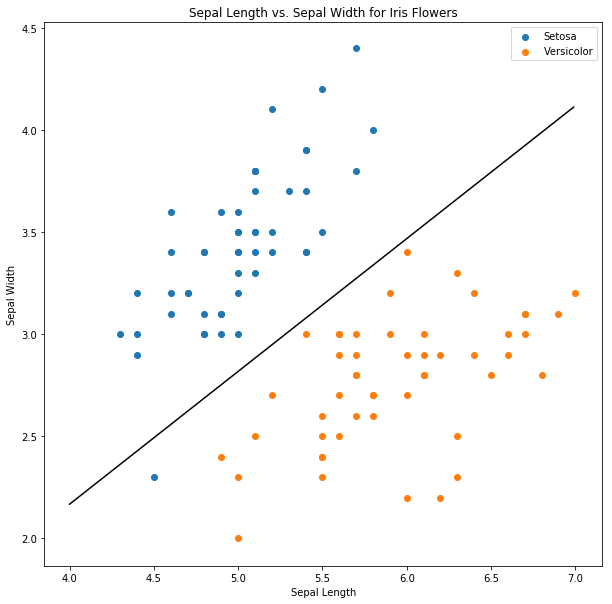

In [7]:
# Visualizing what data looks like
# We can see the data is linearly seperable
s_sl = np.array(data[data['Species'] == 'setosa']['SepalLength'])
s_sw = np.array(data[data['Species'] == 'setosa']['SepalWidth'])
v_sl = np.array(data[data['Species'] == 'versicolor']['SepalLength'])
v_sw = np.array(data[data['Species'] == 'versicolor']['SepalWidth'])

plt.figure(figsize=(10, 10))
plt.scatter(s_sl, s_sw, label="Setosa")
plt.scatter(v_sl, v_sw, label="Versicolor")
plt.ylabel('Sepal Width')
plt.xlabel('Sepal Length')
plt.title('Sepal Length vs. Sepal Width for Iris Flowers')
plt.legend()
plt.plot(x, y, color='black')

In [9]:
print(slope)
print(y_int)

0.6498625114573789
-0.4317140238313474
